[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Tduckenfield/wisa_motionmag_tutorial/blob/main/notebooks/bye.ipynb)

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
#from google.colab import drive  # Access your google drive files
#drive.mount('/content/gdrive')

!gdown 1Sofe9IFkTzVFMGuAlmOw4SnNDSFQQP5v --output myvideo.mov

save_path = "/content/myvideo.mov"
# I encourage you to use your own video! In which case, change your path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dtcwt: filename=dtcwt-0.12.0-py3-none-any.whl size=87869 sha256=0f9b61c5c08c0e8ee8cc06e59e5300b09dc699a510a5f555bb8b2cc3ca04806f
  Stored in directory: /root/.cache/pip/wheels/af/50/50/cf98b0e08812889d0f5789d271acbdab7ac7c3086c323a8e0a
Successfully built dtcwt
Mounted at /content/gdrive


Usually best to compress any ,mov from an iphone etc.

In [6]:
from IPython.display import HTML
from base64 import b64encode
import os

# Compressed video path. Works with mp4, mov etc. Compress since colab sometimes fails if too big.
compressed_path = "/content/myvideo_compressed.mp4"

# Use ffmpeg to convert video
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [7]:
import cv2

input_video_filename = compressed_path

videoReader = cv2.VideoCapture(input_video_filename)  # create video object
nFrames = int(videoReader.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(videoReader.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(videoReader.get(cv2.CAP_PROP_FRAME_HEIGHT))

print("Total Number of Frames = ", nFrames)
print("Each frame has dimensions = ",frameHeight,"x", frameWidth) # Which way around?

# Note we specify float32 since necessary for cv2.color_bgr2gray
img_array_rgb = np.zeros((nFrames, frameHeight,frameWidth, 3), np.dtype("float32"))
img_array = np.zeros((nFrames, frameHeight,frameWidth), np.dtype("float32"))

nf = 0
ret = True

while (nf < nFrames  and ret):  # Could do for loop as well
#		print("frame: " + str(nf))
    ret, img_array_rgb[nf] = videoReader.read()
    img_array[nf] = cv2.cvtColor(img_array_rgb[nf], cv2.COLOR_RGB2GRAY)
    nf += 1
#		if ret == False or img is None:
#				print("done")
#				break

#videoWriter = make_video_writer(videoReader, output_video_filename)

videoReader.release()

Total Number of Frames =  82
Each frame has dimensions =  1920 x 1080


In [9]:
%pip --quiet install dtcwt
!git clone https://github.com/Sergey-Anfinogentov/motion_magnification.git
%cd /content/motion_magnification
from magnify import *

k = 15 
w = np.ceil(nFrames/3)

myvideo_mag = magnify_motions_2d(img_array, k, 20)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'motion_magnification'...
remote: Enumerating objects: 65, done.
remote: Total 65 (delta 0), reused 0 (delta 0), pack-reused 65
Unpacking objects: 100% (65/65), 13.17 KiB | 749.00 KiB/s, done.
/content/motion_magnification
Forward DTCWT... DONE
Modifying phase... DONE
Inverse DTCWT... DONE


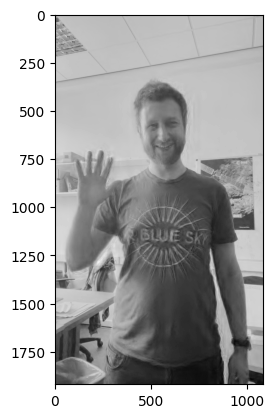

In [34]:
from matplotlib import animation

output_path = '/content/mymovie_mm.mp4'

Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=180)

def Create_Animation(image,number_of_files,title):
    ## Create an Array of pictures from a Data Cube
    images=[]
    fig=plt.figure()
    for i in range(number_of_files):
        img_plot=plt.imshow(image[i], cmap='gray')   # Output in greyscale
        images.append([img_plot])
    ani = animation.ArtistAnimation(fig, images, interval=100, blit=True)
    ani.save(title,writer=writer)
    return images

images=Create_Animation(myvideo_mag,nFrames,output_path)

In [36]:
# Show video
# Remember to adjust to your google drive if you want to save after you close the session!
#mp4 = open('/content/gdrive/MyDrive/mymovie_mm.mp4','rb').read()
mp4 = open('/content/mymovie_mm.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)